# Морфология 2
В данном ноутбуке находится задание на триграммы и словарь. В качестве текста будем использовать томик войны и мира: https://goo.gl/qcVTLE 

Для начала напомним некоторые полезные инструменты на питоне

## 1. Инструменты

### 1.1. Регулярные выражения
Исчерпывающий пост https://habr.com/ru/post/349860/

In [1]:
import re

# С помощью рег. выражения можно искать, заменять и сентезировать строки по шаблонам
# Парочка простых примеров
numbers = re.findall(r'\d+', r'There is some numbers: 49 and 432')
print('Находим числа в строке: ', numbers)

print('Простенький токенизатор: ', re.sub('[,\.?!]',' ','How, to? split. text!').split())

print('Еще один токенизатор: ', re.split(r'\W+', 'How, to? split. text! Again'))

# в качестве тренировки придумайте свой токенизатор в случае, когда из текста нужно получить только русские слова.

Находим числа в строке:  ['49', '432']
Простенький токенизатор:  ['How', 'to', 'split', 'text']
Еще один токенизатор:  ['How', 'to', 'split', 'text', 'Again']


### 1.2. Чтение файлов
Чтобы не мучится самим с кодировками, приведем способ чтения файла корпуса.

In [2]:
text_file_path = 'wp.txt'

In [3]:
import io
import re
wordlilist = None
with io.open(text_file_path, "r") as text_file:
    text = text_file.read()
    wordlist = re.sub('[^А-я]',' ',text).lower().split()
print(wordlist[0:100])
    # wordlist = Здесь заиспользуем токенизатор. Также приведем все слова к нижнему регистру.

['лев', 'николаевич', 'толстой', 'война', 'и', 'мир', 'том', 'часть', 'первая', 'е', 'поместья', 'мой', 'верный', 'раб', 'ну', 'что', 'князь', 'генуа', 'и', 'лукка', 'стали', 'не', 'больше', 'как', 'поместьями', 'фамилии', 'бонапарте', 'нет', 'я', 'вас', 'предупреждаю', 'если', 'вы', 'мне', 'не', 'скажете', 'что', 'у', 'нас', 'война', 'если', 'вы', 'еще', 'позволите', 'себе', 'защищать', 'все', 'гадости', 'все', 'ужасы', 'этого', 'антихриста', 'право', 'я', 'верю', 'что', 'он', 'антихрист', 'я', 'вас', 'больше', 'не', 'знаю', 'вы', 'уж', 'не', 'друг', 'мой', 'вы', 'уж', 'не', 'мой', 'верный', 'раб', 'как', 'вы', 'говорите', 'ну', 'здравствуйте', 'здравствуйте', 'я', 'вижу', 'что', 'я', 'вас', 'пугаю', 'садитесь', 'и', 'рассказывайте', 'так', 'говорила', 'в', 'июле', 'года', 'известная', 'анна', 'павловна', 'шерер', 'фрейлина', 'и']


### 1.3. ООП
В питоне можно создавать свои классы, скорее всего нам понадобится класс для хранения бора

In [4]:
class Node:
    def __init__(self):
        '''
        Simple constructor without params
        '''
        pass
    
    def method(self, par):
        '''
        Simple method with one param
        '''
        pass
    
# все данные хранятся в self, поэтому он и передается первым аргументом во все методы

### 1.4. pyplot
Довольно часто приходится построить какие-нибудт графики и гистограммы для изучения данных, с которыми придется работать. Для этого в питоне есть удобнейший модуль для этого - pyplot. Туториал: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

In [5]:
#!pip install matplotlib # Установка модуля
import matplotlib.pyplot as plt
# команда чтобы картинки рисовались прямо в ноутбуке
%matplotlib inline 

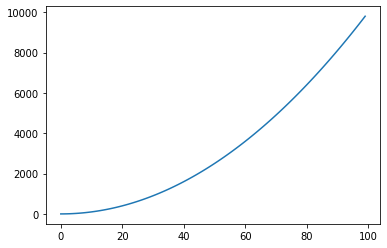

In [6]:
# Посмотрим на график функции x^2
data = [i * i for i in range(100)]
plt.plot(data)

(array([32., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([   0. ,  980.1, 1960.2, 2940.3, 3920.4, 4900.5, 5880.6, 6860.7,
        7840.8, 8820.9, 9801. ]),
 <a list of 10 Patch objects>)

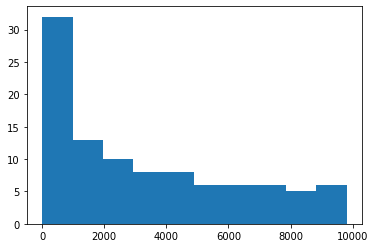

In [7]:
# и распределение по значениям
plt.hist(data)

Также полезная команда для подсчета времения выполнения в ячейке

In [8]:
%%time
res = 0
for i in range(int(1e8)):
    res += 1

CPU times: user 12 s, sys: 0 ns, total: 12 s
Wall time: 12 s


## 2. Задание
Собственно теперь нам потребуется написать подсчет триграмм и бор для словаря, чтобы реализовать простенькую систему исправления ошибок.

### 2.1. Триграммы
Для начала получим словарь триграмма - её кол-во в тексте, не забывая о начале и конце слова.

Далее можно построить гистограмму на кол-во вхождений триграмм, и посмотреть самые частые и какая частота у каких-нибудь заведомо странных, например: 'чгк', 'шкя' и подобные. Из полученных данных придумать эвристику, как считать слово с опечаткой. Проверить эвристику по словарю.

In [9]:
from nltk import ngrams
from nltk import FreqDist

In [10]:
def corpus_trigrams(word_list):
    '''returns trigrams count dictionary'''
    a = []
    for i in range(len(word_list)):
        a.extend(list(ngrams('##' + word_list[i] + '##', 3)))
    return FreqDist(a)

def is_error(word, threshold=100):
    '''is the word with mistake'''
    d = corpus_trigrams(wordlist)
    for i in list(ngrams('##' + word.lower() + '##', 3)):
        if (d[i] < threshold):
            return True#'Слово "{}" скорее всего ошибочное'.format(word)
    return False#'Слово "{}" скорее всего верное'.format(word)

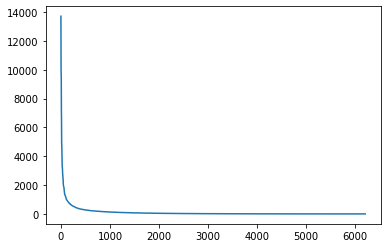

In [11]:
q = corpus_trigrams(wordlist)
qw = list(q.values())
qw.sort(reverse=True)
plt.plot(qw)

In [12]:
is_error('сталь')

False

In [13]:
is_error('стальк')

True

### 2.2. Бор
Далее построим бор, с помощью которого будем искать исправления опечатки в слове. Пока только в случае замены и удаления в конце (Если есть желание, то можно и для всех случаев). Также сравнить по времени с поиском в случае замены в исходном слове последних двух символов и поиске в словаре.

In [14]:
class Node:
    def __init__(self):
        super(Node, self).__init__()
        self.childrens = dict() # char to Node
        self.is_end_word = False
        self.parent = None
        self.parent_char = None
    
    def __repr__(self):
        return 'Bor({})'.format(self.childrens.keys())
    
    def add_word_to_bor(self, word):
        node = self
        for char in word:
            if char not in node.childrens.keys():
                new_node = Node()
                new_node.parent = node
                new_node.parent_char = char
                node.childrens[char] = new_node
            node = node.childrens[char]
        node.is_end_word = True
        
    def word_in_bor(self, word):
        node = self
        for char in word:
            if char in node.childrens.keys():
                node = node.childrens[char]
            else:
                return False
        return node.is_end_word

In [15]:
bor = Node()

In [16]:
bor = Node()
for word in wordlist:
    bor.add_word_to_bor(word)
bor

Bor(dict_keys(['л', 'н', 'т', 'в', 'и', 'м', 'ч', 'п', 'е', 'р', 'к', 'г', 'с', 'б', 'ф', 'я', 'у', 'з', 'э', 'а', 'о', 'д', 'ш', 'ж', 'х', 'ц', 'щ', 'ю', 'ы', 'ъ', 'ь', 'й']))

In [17]:
bor.childrens

{'л': Bor(dict_keys(['е', 'у', 'а', 'и', 'ы', 'ю', 'о', 'ь', 'б', 'г', 'ж', 'я', 'ш'])),
 'н': Bor(dict_keys(['и', 'у', 'е', 'а', 'о', 'ы', 'р', 'э', 'я', 'ю'])),
 'т': Bor(dict_keys(['о', 'а', 'е', 'и', 'я', 'у', 'р', 'ы', 'в', 'щ', 'ь', 'к', 'ю'])),
 'в': Bor(dict_keys(['о', 'е', 'а', 'ы', 'с', 'и', 'р', 'д', 'м', 'з', 'п', 'н', 'л', 'т', 'х', 'в', 'к', 'ч', 'б', 'ъ', 'я', 'у', 'ь', 'г'])),
 'и': Bor(dict_keys(['ю', 'з', 'м', 'л', 'н', 'г', 'с', 'щ', 'х', 'п', 'д', 'е', 'к', 'т', 'р', 'в', 'б', 'ш'])),
 'м': Bor(dict_keys(['и', 'о', 'н', 'а', 'е', 'у', 'ы', 'р', 'я', 'с', 'г', 'л', 'ю'])),
 'ч': Bor(dict_keys(['а', 'т', 'и', 'у', 'е', 'р', 'л', 'о', 'ь'])),
 'п': Bor(dict_keys(['е', 'о', 'р', 'у', 'а', 'л', 'и', 'я', 'ь', 'ы', 'т', 'ч', 'г', 'ш'])),
 'е': Bor(dict_keys(['с', 'щ', 'е', 'й', 'ж', 'в', 'м', 'г', 'р', 'х', 'з', 'к', 'д', 'л', 'ю', 'ф', 'б'])),
 'р': Bor(dict_keys(['а', 'е', 'у', 'о', 'т', 'и', 'я', 'в', 'ю', 'э', 'ы', 'ж', 'с', 'р'])),
 'к': Bor(dict_keys(['н', 'а', 'р',

In [18]:
bor.word_in_bor('николай'), bor.word_in_bor('никонлай'), bor.word_in_bor('йорк')

(True, False, True)

In [19]:
bor.childrens['й'].childrens['о'].childrens['р'].childrens['к']

Bor(dict_keys([]))

In [20]:
bor.word_in_bor('йорк')

True

In [21]:
def liv_dist(a, b):
    n, m = len(a), len(b)
    if n > m:
        a, b = b, a
        n, m = m, n
    current_row = range(n + 1)
    for i in range(1, m + 1):
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j] + 1, current_row[j - 1] + 1, previous_row[j - 1]
            if a[j - 1] != b[i - 1]:
                change += 1
            current_row[j] = min(add, delete, change)
    return current_row[n]

In [22]:
liv_dist('привет','привед')

1

In [23]:
liv_dist('абвгд','123абв123')

6